# Worksheet 1 - Scientific Visualization MVE080/MMG640
## Basics in Python, Jupyter, plotnine and how to visualize amounts

This is the first worksheet in the course *Scientific Visualization*. This Jupyter notebook has three functions:

1. It describes the tasks.
2. It (sometimes) provides coding templates that you can use as a basis for your own code.
3. It is a template also for the report that you upload in Canvas.

The tasks are of various types: some are to read some text and then comment on it (no coding), and some are about creating visualizations using plotnine.
Once you're finished with all the tasks, export this document as an HTML-file and upload it in Canvas.
You are encouraged to discuss problems and solutions with your fellow students (in the class-room but also on CampusWire), but each student must solve all tasks by themselves and hand-in their own report.
Notice that Jupyter notebooks use [Markdown](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax#links) for writing text cells. Make sure you understand the basics. Later on you can also include $\LaTeX$ in your Markdown cells.

Throughout the assignment you shall use a Python workflow.
If you are completely new to Python, take a look at [this page](pythonbasics.org).
Python can do essentially all that MATLAB can, plus more. 
In this course we shall use Python in different contexts, starting with the [Jupyter Notebook interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html). 

Matrices and arrays are handled through the NumPy module. [Learn here](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html) how NumPy is different from MATLAB.

The below loads the packages required for this homework.

In [240]:
import numpy as np
import pandas as pd
from plotnine import *
# Currently in a plotine dependancy they have deprication warning, so 
# we mute warnings to have a better experience
import warnings
warnings.filterwarnings("ignore")

# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#F0E442", "#0072B2", "#D55E00", 
             "#CC79A7", "#999999"]

## Task 1

Read Chapter 1-3 of [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/), then answer the questions below.

### Question 1.1
Describe the visualization concept _scales_. 

### Answer 1.1
_Your answer here_

_A scale defines a unique mapping between data and aesthetics._

### Question 1.2
In Figures 2.3 and 2.4 the same data is visualized in two different ways. Discuss the pros and cons of the two approaches. Which one do you prefer and why?

### Answer 1.2
_Your answer here_

<table>
  <tr>
    <th></th>
    <th>Pros</th>
    <th>Cons</th>
  </tr>
  <tr>
    <td>Line plot</td>
    <td><i>Easier to see the specific numerical value of<br/>the data (more accurate estimation).</i></td>
    <td>
      <i>1. This is discrete data, so the values at each point<br/>on the line may not always make sense in reality. <br/>
      2. Visual noise - if we need to consider many cities, <br/>
      there may be too many different colored lines, making<br/>
      it difficult to distinguish which is which.</i>
    </td>
  </tr>
  <tr>
    <td>Heatmaps</td>
    <td><i>Not accurate at the value level, we cannot obtain<br/>the exact temperature value (not even in a small<br/> range) through the depth of color.</i></td>
    <td><i>Suitable for discrete data, avoiding much data noise.</i></td>
  </tr>
</table>

### Question 1.3
Describe situations when _nonlinear axes_ might be useful.
When should they not be used?

### Answer 1.3
_Your answer here_

_We should consider nonlinear axes when the data are obtained not by addition/substraction. For example, if the data are obtained by division like ratio data, then on the log scale we can plot a much broader spectrum of things than the linear sclae._

_When the data are obtained by addition/substraction, or if the data is unavailable on the nonlinear scale we choose.(0 is unavailable on the log scale)_

### Question 1.4
In which situations could a _polar coordinate system_ be useful? 

### Answer 1.4
_Your answer here_

_Polar coordinates can be useful for data of a periodic nature._

## Task 2 - Tidy data, ggplot and distributions

Several graphics libraries such as ggplot2 and plotnine are at their best when the provided data is tidy. However, data is often not provided in a tidy format, hence being able to transform non-tidy data into tidy data is a crucial skill. 

### Question 2.1 

In the lecture I provided a small non-tidy dataset (code below).

In [241]:
data1 = pd.DataFrame({"Site" : ["Stockholm", "Gothenburg", "London"], 
                      "1999" : [13, 85, 77], 
                      "2000" : [21, 31, 15]})
data1

,Site,1999,2000
0,Stockholm,13,21
1,Gothenburg,85,31
2,London,77,15


Transform this small dataset into a tidy dataset. Print the table below (as I did above). 

*Hint* [melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

In [242]:
# Write you answer here
pd.melt(data1, id_vars=["Site"], value_vars=["1999", '2000'])

,Site,variable,value
0,Stockholm,1999,13
1,Gothenburg,1999,85
2,London,1999,77
3,Stockholm,2000,21
4,Gothenburg,2000,31
5,London,2000,15


### Question 2.2

Datasets are often bigger than above. I have made a subset of the weather data used in the lecture non-tidy (available on the webpage). 

Transform this dataset into a tidy dataset. Print the table below (as I did above)

In [243]:
# Write your answer here
df = pd.read_csv('weather_not_tidy.csv')
x = pd.melt(df, id_vars=['month', 'day', 'hour_of_day'], value_vars=['Temp2009', 'Temp2010'])
x

,month,day,hour_of_day,variable,value
0,Jan,1,12,Temp2009,-0.9
1,Jan,2,12,Temp2009,-2.2
2,Jan,3,12,Temp2009,4.2
3,Jan,4,12,Temp2009,-4.7
4,Jan,5,12,Temp2009,-7.8
...,...,...,...,...,...
725,Dec,27,12,Temp2010,-6.8
726,Dec,28,12,Temp2010,-11.0
727,Dec,29,12,Temp2010,-10.6
728,Dec,30,12,Temp2010,-3.0


## Distributions

For this part reading Chapter 7 and 9 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) helps.

## Question 3.1

The benefit with tidy data is that it is easy to work with. For this task use the tidy weather dataset from above and choose three months and by **a density and histogram plot** visualize the differences in temperature between 2009 and 2010 for the chosen months in a readable manner. Make sure to print the visuals below. 

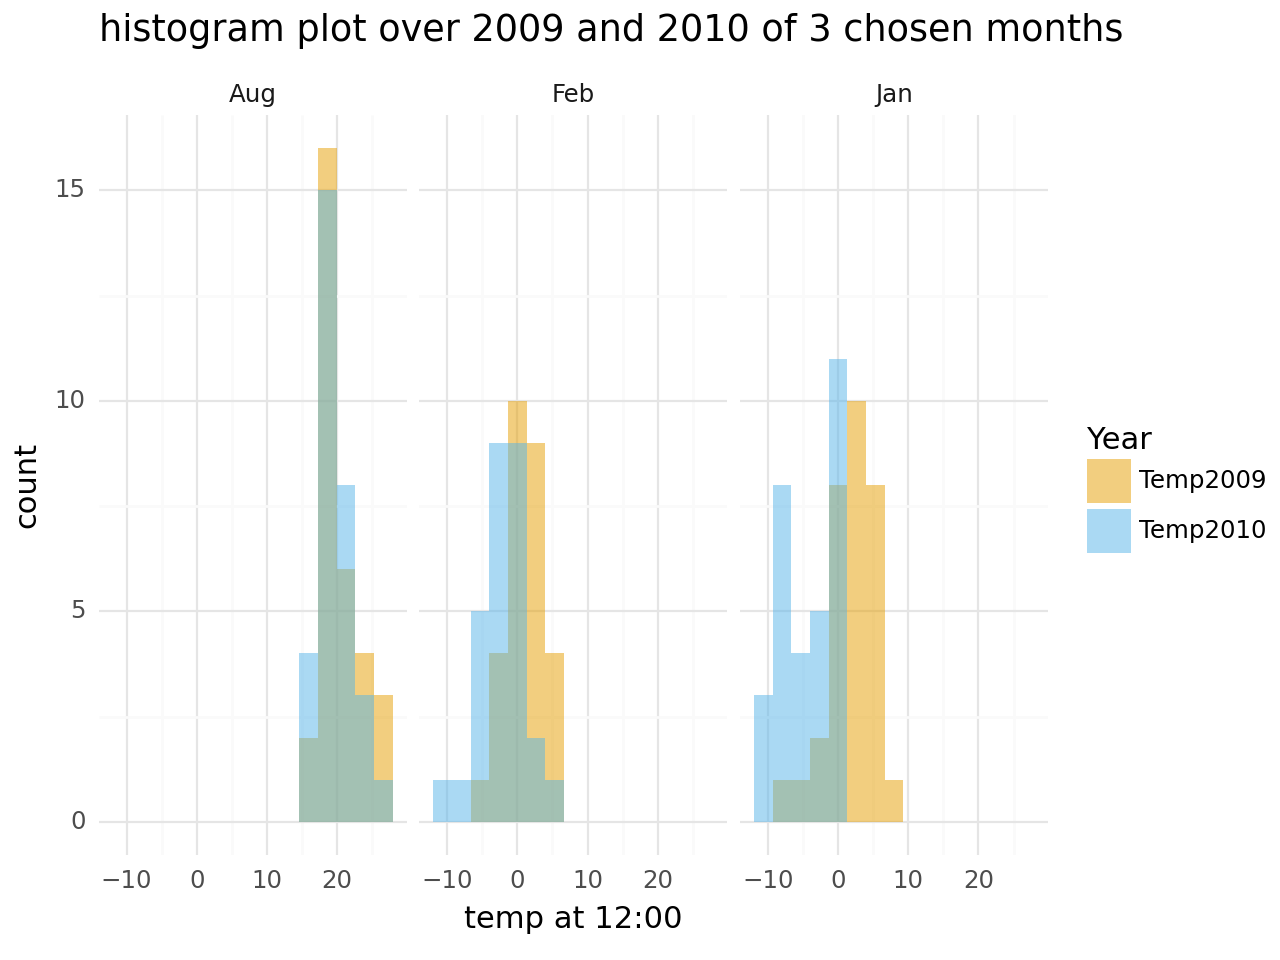

<Figure Size: (640 x 480)>

In [244]:
# Insert code here for histogram

data_tidyweather_3 = x.query("(month == 'Jan' or month == 'Feb' or month == 'Aug') and hour_of_day == 12 and (variable == 'Temp2009' or variable == 'Temp2010')")
# data_tidyweather_3 = data_tidyweather_3.assign(year= pd.Categorical(data_tidyweather_3['variable']))

p1 = (ggplot(data_tidyweather_3, aes('value', fill = 'variable'))
      + geom_histogram(bins=15, alpha = 0.5, position = 'identity')
      + scale_fill_manual(values=cbPalette, name = "Year")
      + labs(x = 'temp at 12:00', title = 'histogram plot over 2009 and 2010 of 3 chosen months')
      + facet_grid('. ~ month')
      + theme_minimal())
p1
# Remember to print the visual 

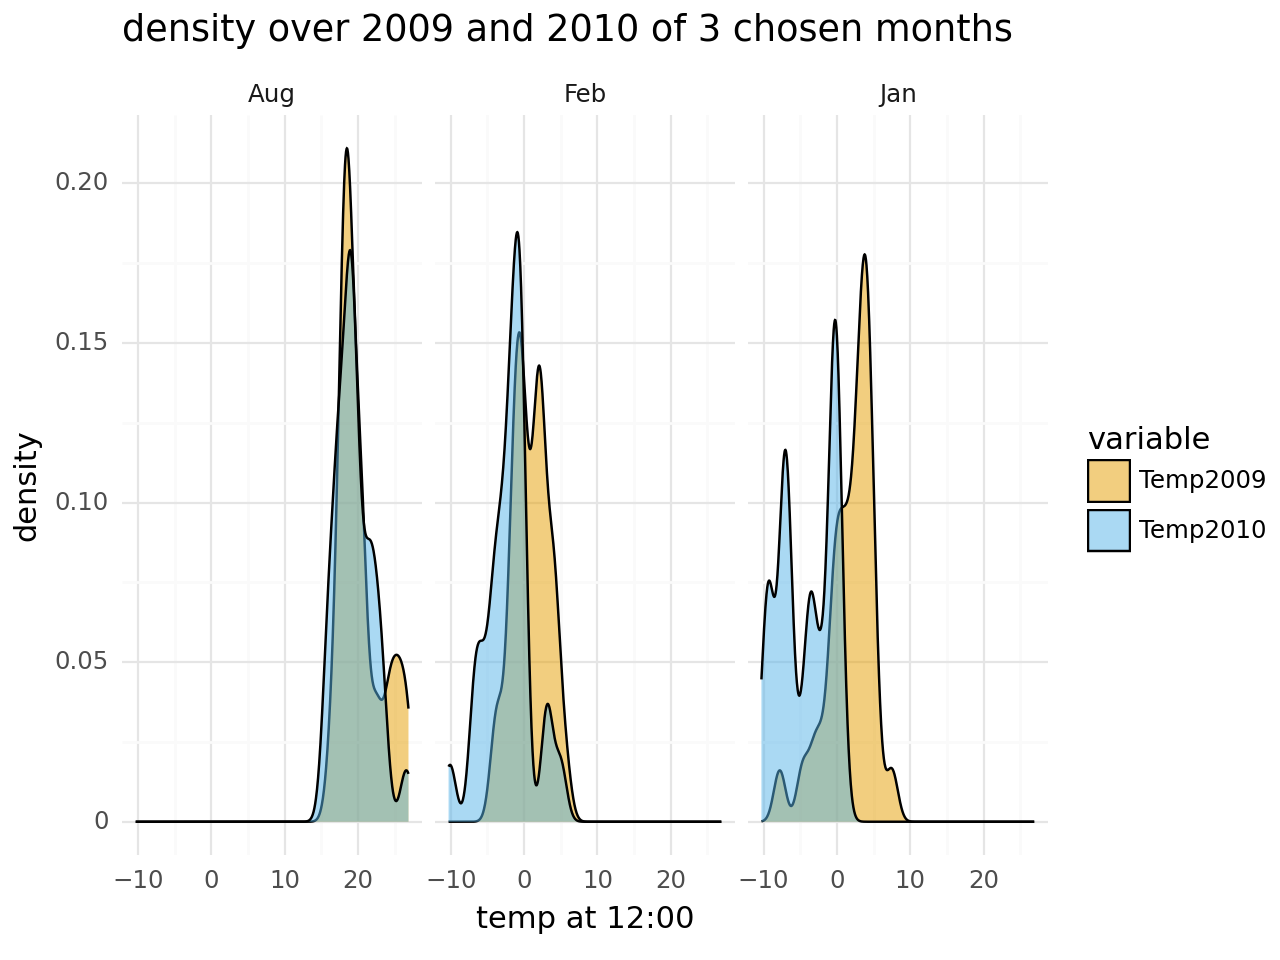

<Figure Size: (640 x 480)>

In [245]:
# Insert code here for density plot
p2 = (ggplot(data_tidyweather_3, aes('value', fill = 'variable'))
      + geom_density(alpha = 0.5, bw = 0.8)
      + scale_fill_manual(values = cbPalette, name = 'variable')
      + labs(x = 'temp at 12:00', title = 'density over 2009 and 2010 of 3 chosen months')
      + facet_grid('. ~ month')
      + theme_minimal())

p2
# Remember to print the visual 

Provide a brief motivation for which plot (density and histogram) you find most readable.



_Your answer here_

_Density plot is more readable in this case, because we're plotting data from two distributions (in each month) rather than one. In the histogram plot, the semi-transparent bar on top of another tends to not look like semi-transparent but instead like a bar drawn in a different color. That will make people confused. And on the other hand, overlapping density plots don’t typically have the problem._

### Question 3.2

In Lecture2 I used boxplots, error-bars, and violin plots to visualize fluctuations in winter temperature in Västerås. Now using the weather data above plot the temperature per month (like in Fig. 9.8 [here](https://clauswilke.com/dataviz/boxplots-violins.html)) using error-bars, boxplots and violin plots with data points. For each month plot the temperature for 2009 and 2010 next to each other (see example on webpage). 

  month  variable      mean  median       std    stderr
0   Jan  Temp2009  1.787097     2.7  3.203617  0.118571
1   Jan  Temp2010 -4.167742    -3.5  3.623294  0.134104
2   Feb  Temp2009  0.864286     0.8  2.426736  0.089818
3   Feb  Temp2010 -2.110714    -1.8  3.194711  0.118242
4   Mar  Temp2009  5.083871     5.3  2.318347  0.085806


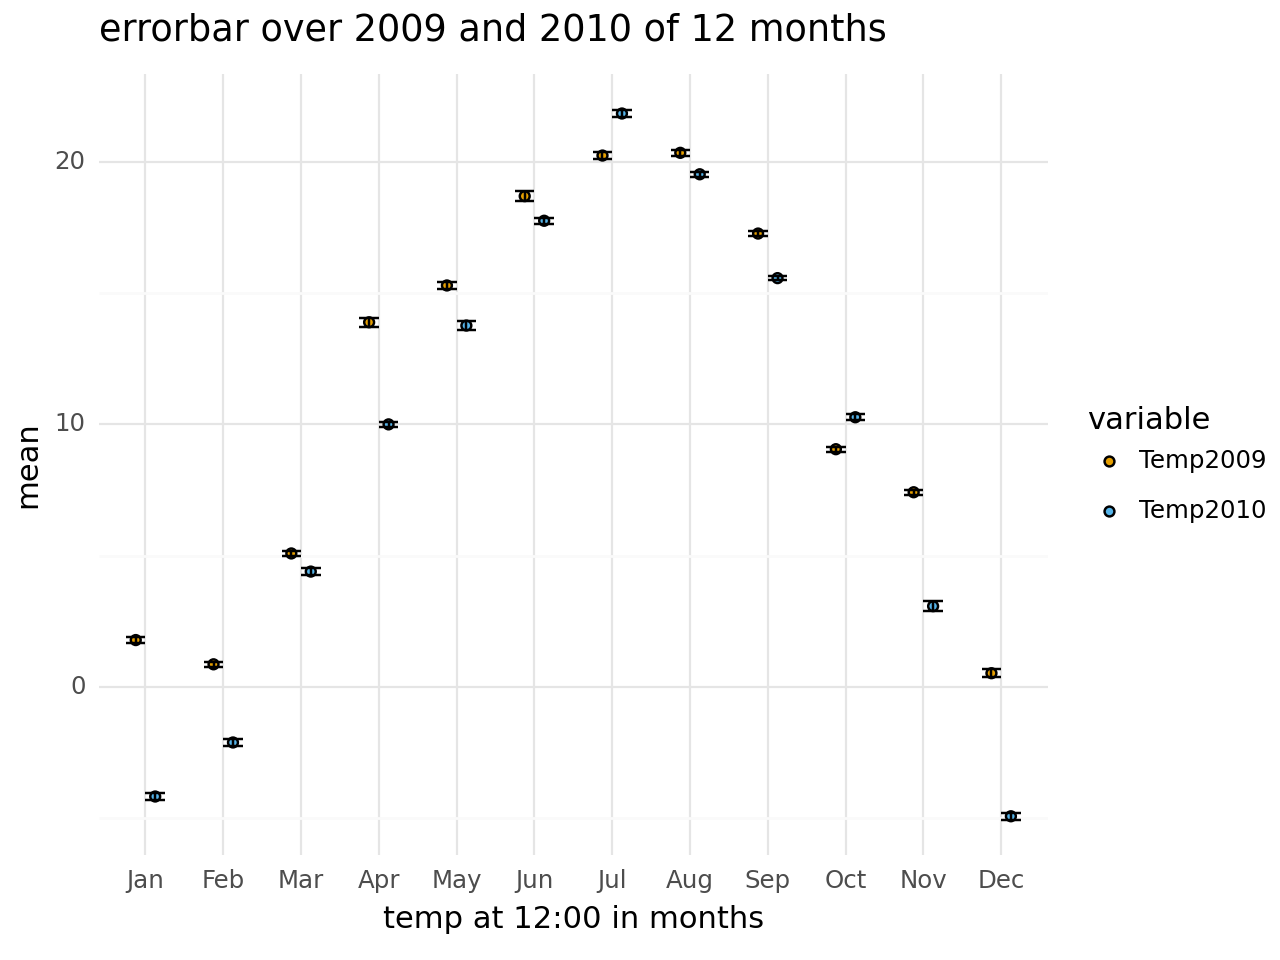

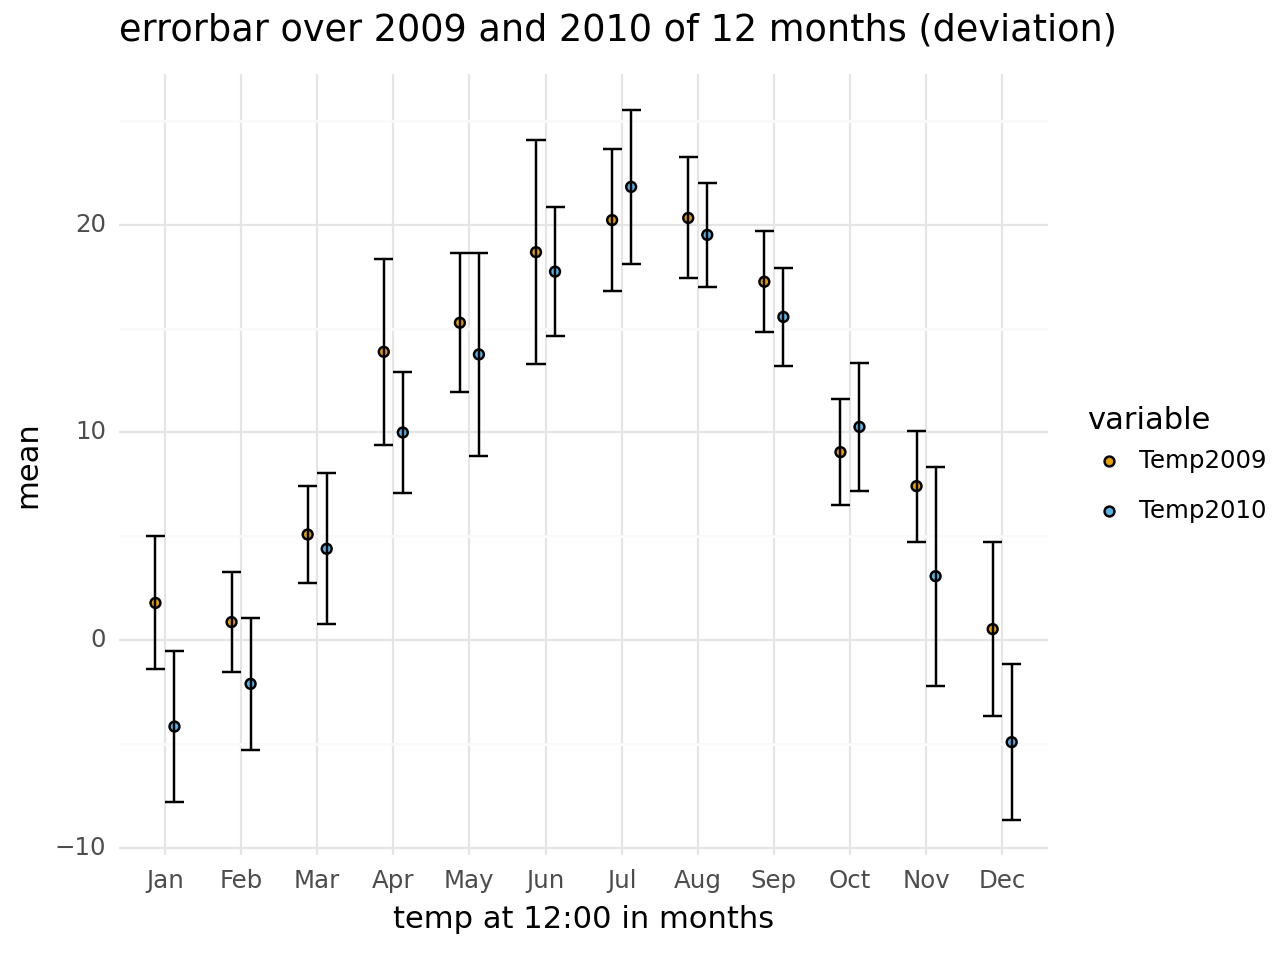

In [246]:
# Insert code here using standard error
x['month'] = pd.Categorical(x['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)

summary = x.groupby(['month', 'variable'])['value'].agg(['mean', 'median', 'std']).reset_index()
summary['stderr'] = summary['std'] / np.sqrt(len(x))
print(summary.head())
summary = summary.assign(month = pd.Categorical(summary['month']))


p3 = (ggplot(summary, aes(x = 'month', y = 'mean', fill = 'variable'))
      + geom_point(position=position_dodge(width=0.5))
      + geom_errorbar(aes(ymin = 'mean - stderr', ymax = 'mean + stderr'), position=position_dodge(width=0.5))
      + scale_fill_manual(values = cbPalette, name = 'variable')
      + labs(x = 'temp at 12:00 in months', title = 'errorbar over 2009 and 2010 of 12 months')
      + theme_minimal())

print(p3)

p3_Stddeviation = (ggplot(summary, aes(x = 'month', y = 'mean', fill = 'variable'))
      + geom_point(position=position_dodge(width=0.5))
      + geom_errorbar(aes(ymin = 'mean - std', ymax = 'mean + std'), position=position_dodge(width=0.5))
      + scale_fill_manual(values = cbPalette, name = 'variable')
      + labs(x = 'temp at 12:00 in months', title = 'errorbar over 2009 and 2010 of 12 months (deviation)')
      + theme_minimal())
print(p3_Stddeviation)
# Remember to print the visual 

  month  day  hour_of_day  variable  value
0   Jan    1           12  Temp2009   -0.9
1   Jan    2           12  Temp2009   -2.2
2   Jan    3           12  Temp2009    4.2
3   Jan    4           12  Temp2009   -4.7
4   Jan    5           12  Temp2009   -7.8


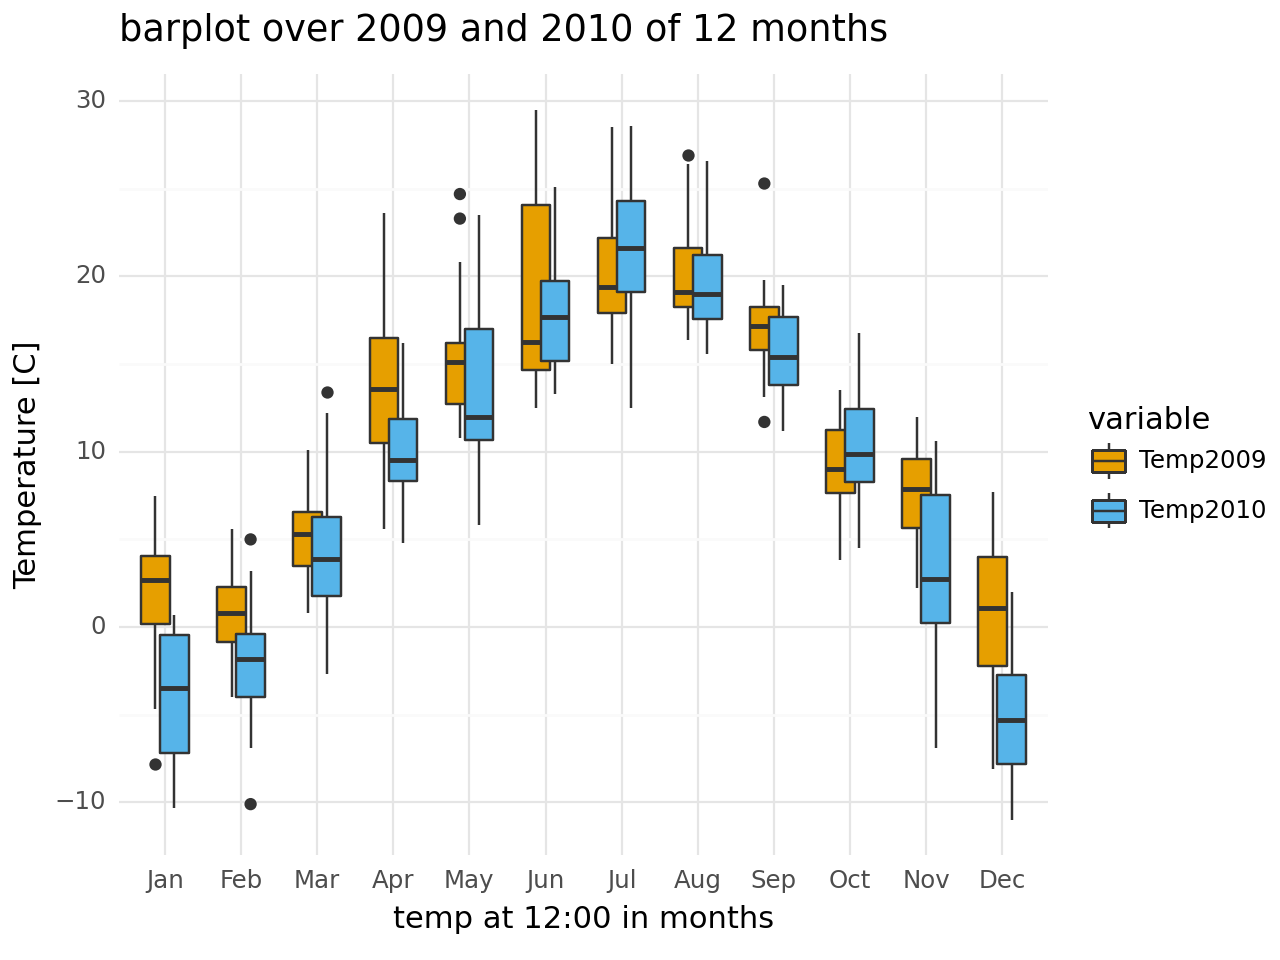

<Figure Size: (640 x 480)>

In [247]:
# Insert code here using boxplots
print(x.head())

# x = x.assign(year = pd.Categorical(x['month']))
x['month'] = pd.Categorical(x['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)


p4 = (ggplot(x, aes(x = 'month', y = 'value', fill = 'variable'))
      + geom_boxplot(position=position_dodge(width=0.5))
      + scale_fill_manual(values = cbPalette, name = 'variable')
      + labs(x = 'temp at 12:00 in months', y = 'Temperature [C]', title = 'barplot over 2009 and 2010 of 12 months')
      + theme_minimal()
      )

p4
# Remember to print the visual 

  month  day  hour_of_day  variable  value
0   Jan    1           12  Temp2009   -0.9
1   Jan    2           12  Temp2009   -2.2
2   Jan    3           12  Temp2009    4.2
3   Jan    4           12  Temp2009   -4.7
4   Jan    5           12  Temp2009   -7.8


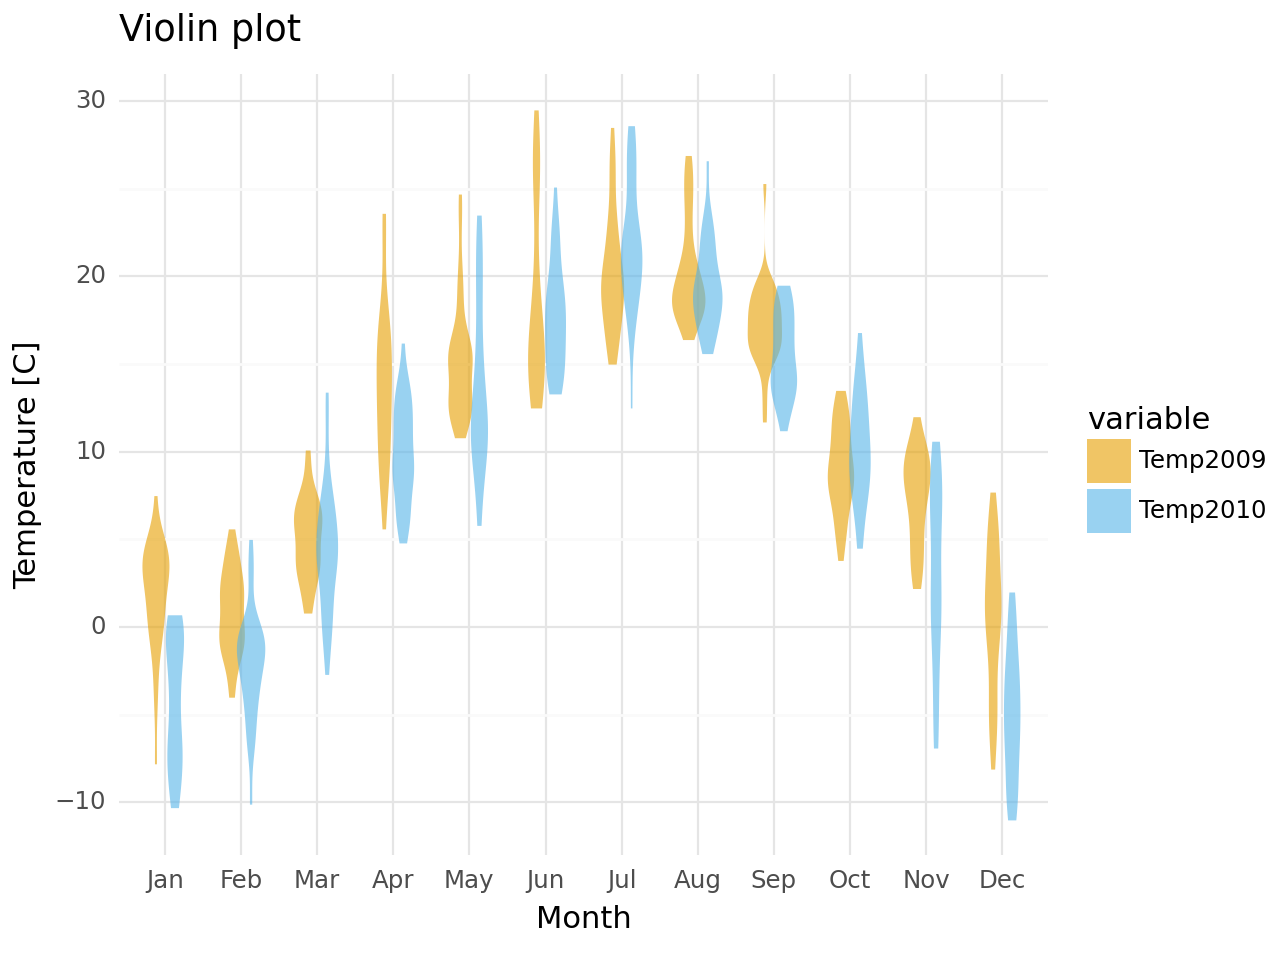

<Figure Size: (640 x 480)>

In [248]:
# Insert code here using violin plot with dots
print(x.head())
p5 = (ggplot(x, aes(x='month', y='value', fill='variable'))
      + geom_violin(alpha=0.6, color=None, position=position_dodge(width=0.5))
      + theme_minimal()
      + labs(y='Temperature [C]', x='Month', title = 'Violin plot')
      + scale_fill_discrete(name="Variable")
      + scale_fill_manual(values = cbPalette, name = 'variable')
      )
p5
# Remember to print the visual 

Briefly discuss the drawback with each approach (standard errors, boxplots, and violin plots). 

__Write answer here__

_Standard errors: In this case, the dataset has both a small standard error of the mean and a large standard deviation(We can see from the plot). And there is no commonly accepted standard of the meaning of the error bars, so people might make mistakes to make inference based on the plot itself._

_Boxplot: Boxplots have difficulty displaying the density distribution of a dataset, such as in the case of bimodal distributions._

_Violin plot: Violin plot could generate the apperance that there is data where actually none exists, or that the data set is very dense where actually sparse._

One of the drawbacks with a violin plot is that it can be hard to read summary statistics from it. Produce a violin plot visual here, where you have also drawn the median for each violin, as well as the data points. 

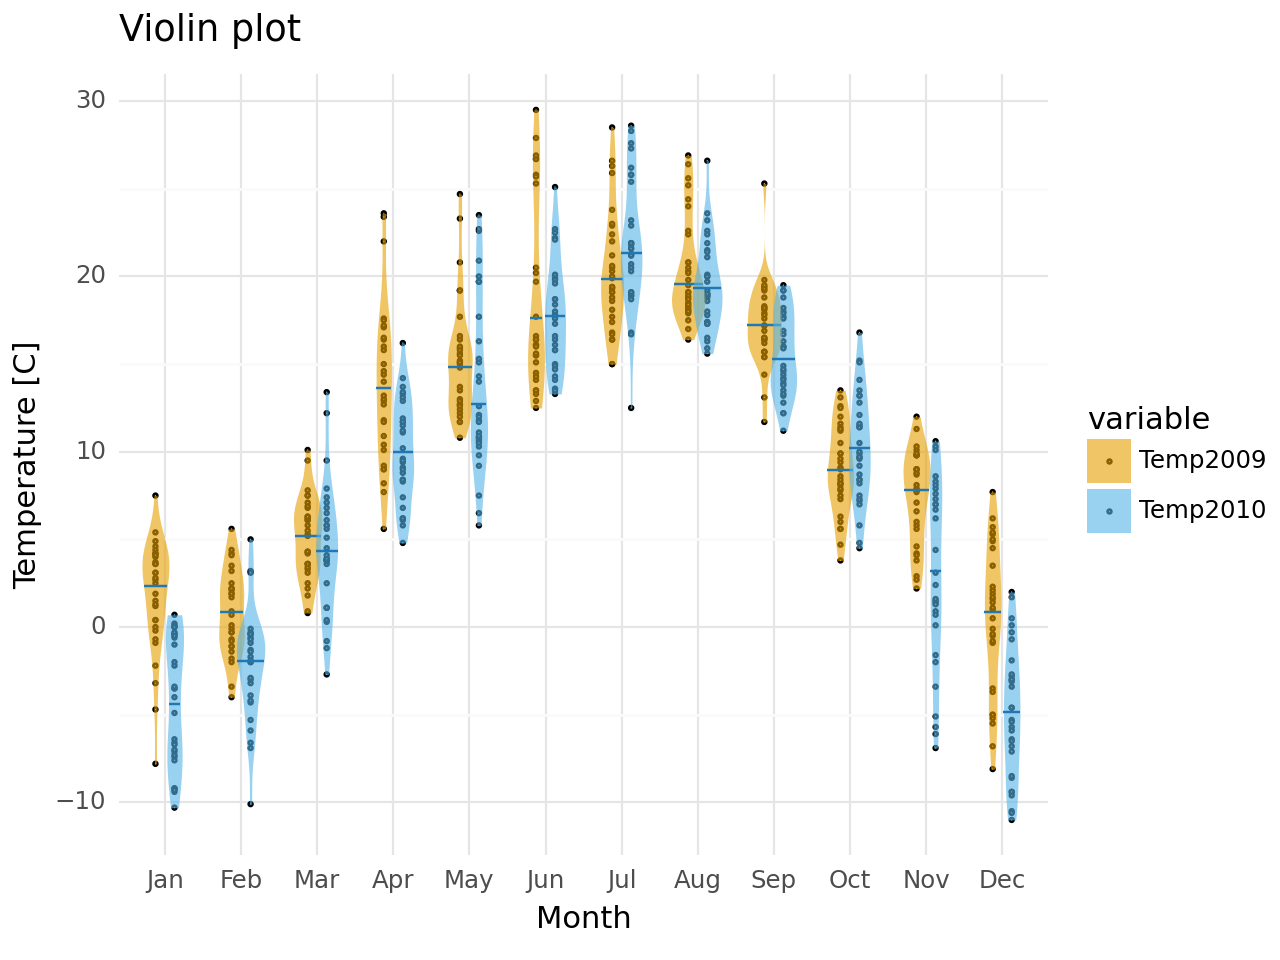

<Figure Size: (640 x 480)>

In [249]:
# Insert code here using violin plot with dots and median line
p6 = (ggplot(x, aes(x='month', y='value', fill='variable'))
      + geom_jitter(size=0.3, position=position_dodge(width=0.5))
      + geom_violin(alpha=0.6, color=None, draw_quantiles=0.5, position=position_dodge(width=0.5))
      + theme_minimal()
      + labs(y='Temperature [C]', x='Month', title = 'Violin plot')
      + scale_fill_discrete(name="Variable")
      + scale_fill_manual(values = cbPalette, name = 'variable')
      )
p6
# Remember to print the visual 

Briefly discuss how you could make it easy for the reader to understand that the line in the visual represent the median.

__Write answer here__

_Draw an example of a violin shape next to it, with different colors above and below the horizontal line, and label them as 50%._

### Question 3.3

Some people argue that visuals should be as minimal as possible. On the webpage you have a bad example of a minimalist way to plot the min, median, and max temperature of each month in 2009 and 2010 using the dataset in Question 3.2 (where you hopefully have filtered out daily temperatures for 2009 and 2010). By **only** using geom\_point recreate the visual (you do not need to recreate the title). **You are not allowed to transform the dataset**.

*Hint - Remember the stat argument in ggplot*

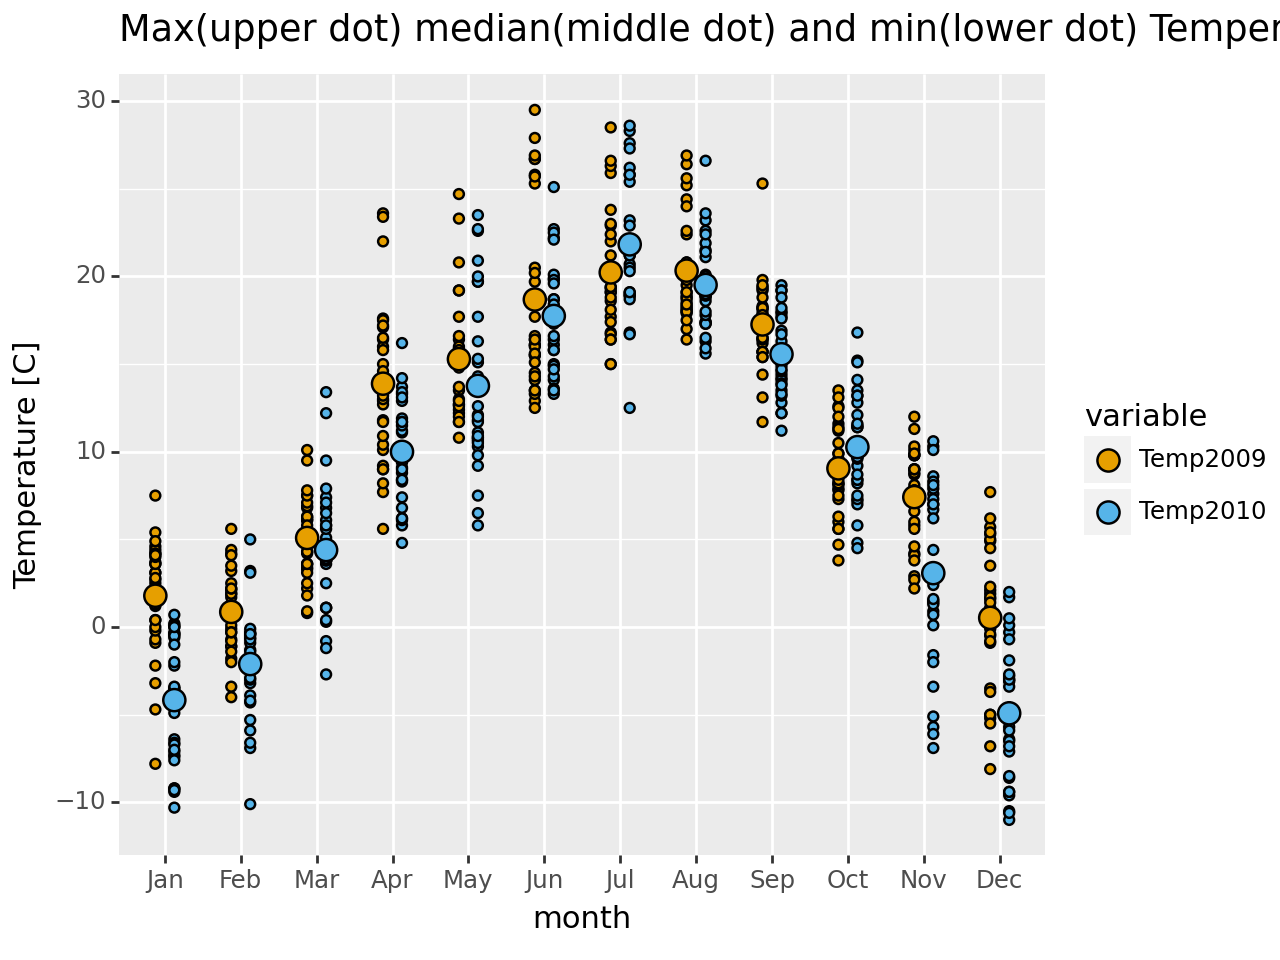

<Figure Size: (640 x 480)>

In [250]:
# Insert code here 
p7 = (ggplot(x, aes(x='month', y='value', fill='variable'))
      + geom_point(position=position_dodge(width=0.5))
      + geom_point(stat = 'summary', fun_y = np.mean, size = 4,
                   position=position_dodge(width=0.5))
      + scale_fill_manual(values = cbPalette, name = 'variable')
      + labs(y = 'Temperature [C]', title = 'Max(upper dot) median(middle dot) and min(lower dot) Temperature'))
p7
# Remember to print the visual 

### Question 3.4

Using the full weather dataset on the webpage create two plots of your on choice. For example, you can compare winter temperatures across years, differences in night and day temperatures etc. For each visual provide a brief motivation on why your choice of visual (e.g violin or boxplot) is a good choice.

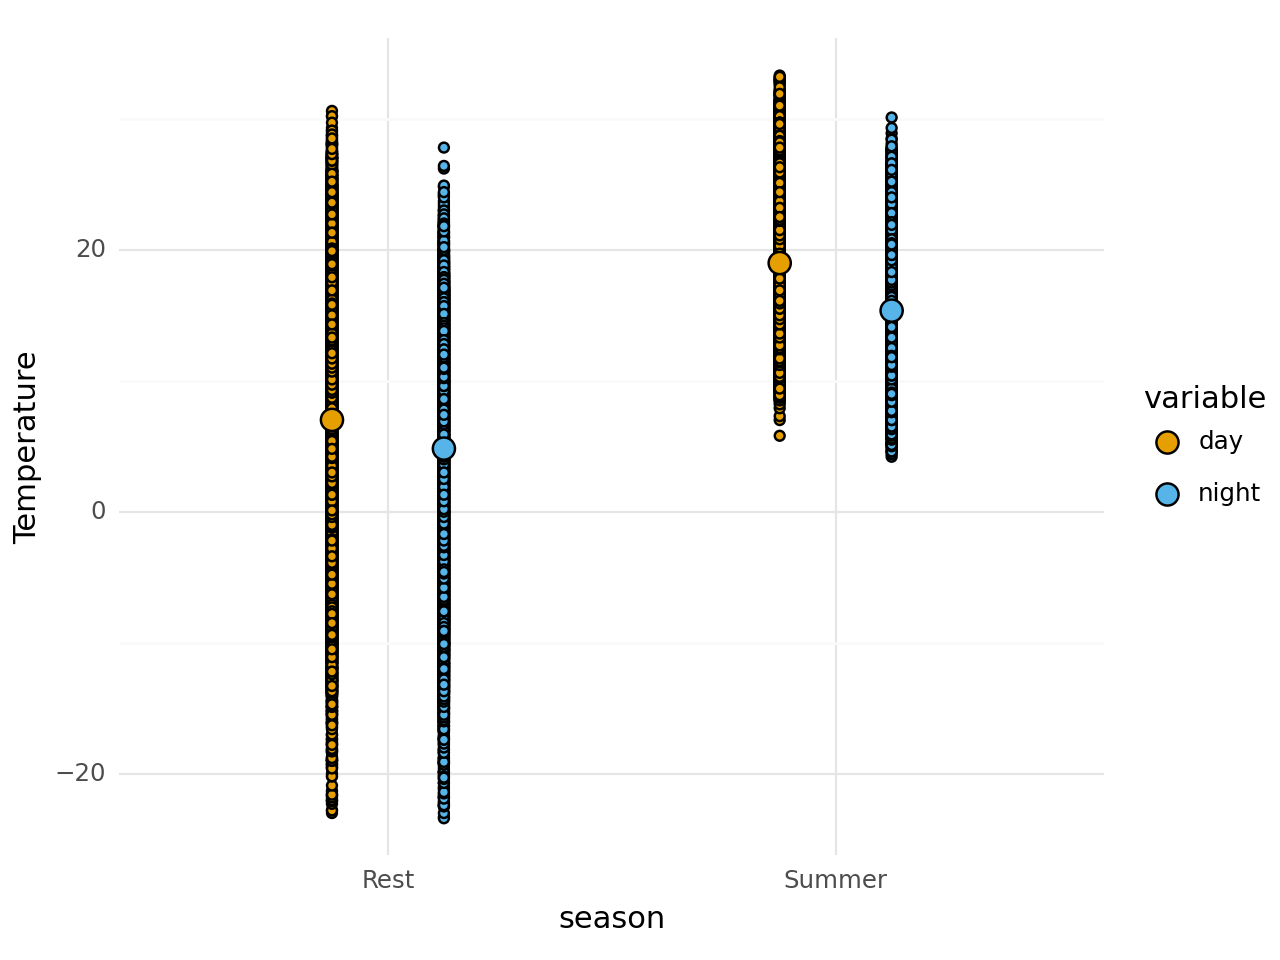

<Figure Size: (640 x 480)>

In [260]:
# Insert code here 
y = pd.read_csv('weather_tidy_full.csv')

y['season'] = y['month'].isin(['Jul', 'Jun', 'Aug']).apply(lambda x: 'Summer' if x else 'Rest')
y['time'] = ((y['hour_of_day'] <= 18) & (y['hour_of_day'] >= 7)).apply(lambda x: 'day' if x else 'night')

p8 = (ggplot(y, aes(x = 'season', y = 'Temperature', fill = 'time'))
      + geom_point(position=position_dodge(width=0.5))
      + geom_point(stat = 'summary', fun_y = np.mean, size = 4,
                   position=position_dodge(width=0.5))
      + theme_minimal()
      + scale_fill_manual(values = cbPalette, name = 'variable'))
p8

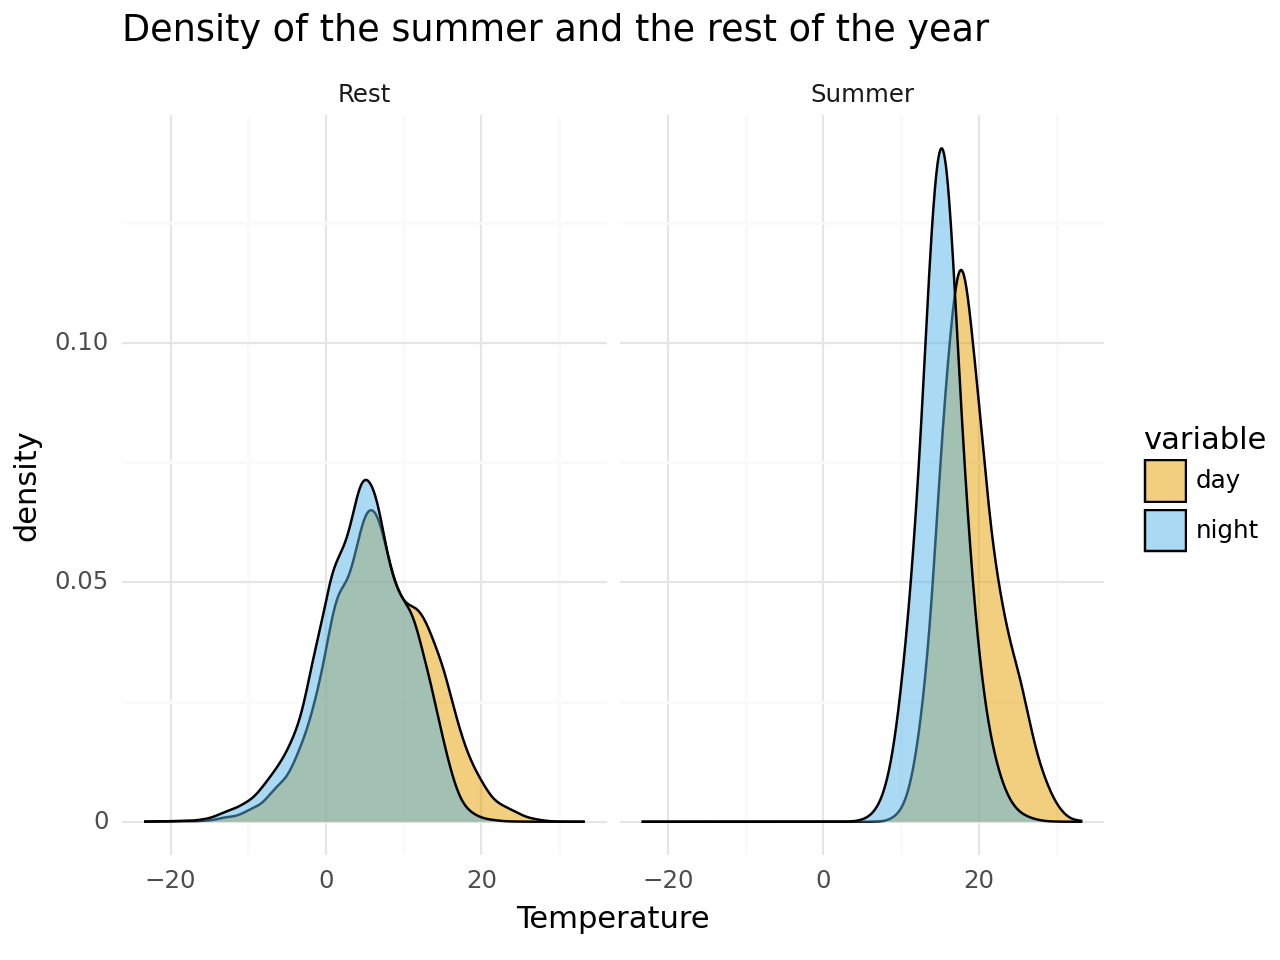

<Figure Size: (640 x 480)>

In [261]:
# Insert code here 
p9 = (ggplot(y, aes('Temperature', fill = 'time'))
      + geom_density(alpha = 0.5, bw = 0.8)
      
      le')
      + labs(x = 'Temperature', title = 'Density of the summer and the rest of the year')
      + facet_grid('. ~ season')
      + theme_minimal())
p9
# Remember to print the visual 

*Brief motivation*

_I want to analyze the temperature differences between summer and other seasons in Sweden over the past 60 years. Initially, I simply examined the temperatures during the day and night for summer and other seasons and marked the means by drawing the point plot. However, this tells us little about the distribution._ 

_Therefore, I created density plots. It can be observed that in summer, both day and night temperatures are higher than in other seasons. More importantly, the distribution of day and night temperatures in summer shows greater variability than the rest of the year. This allows us to infer that there is a larger temperature difference between day and night in summer._

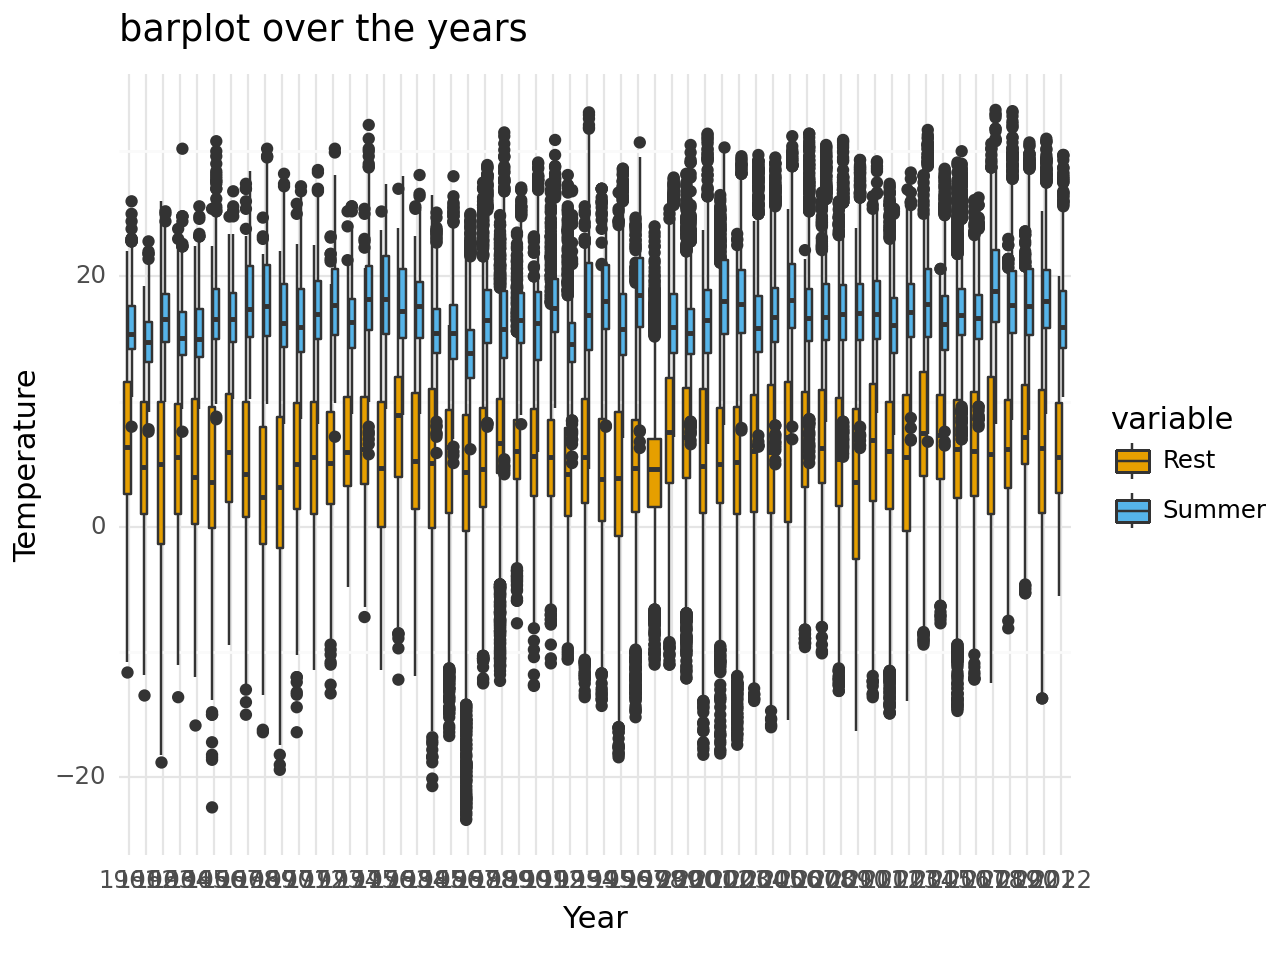

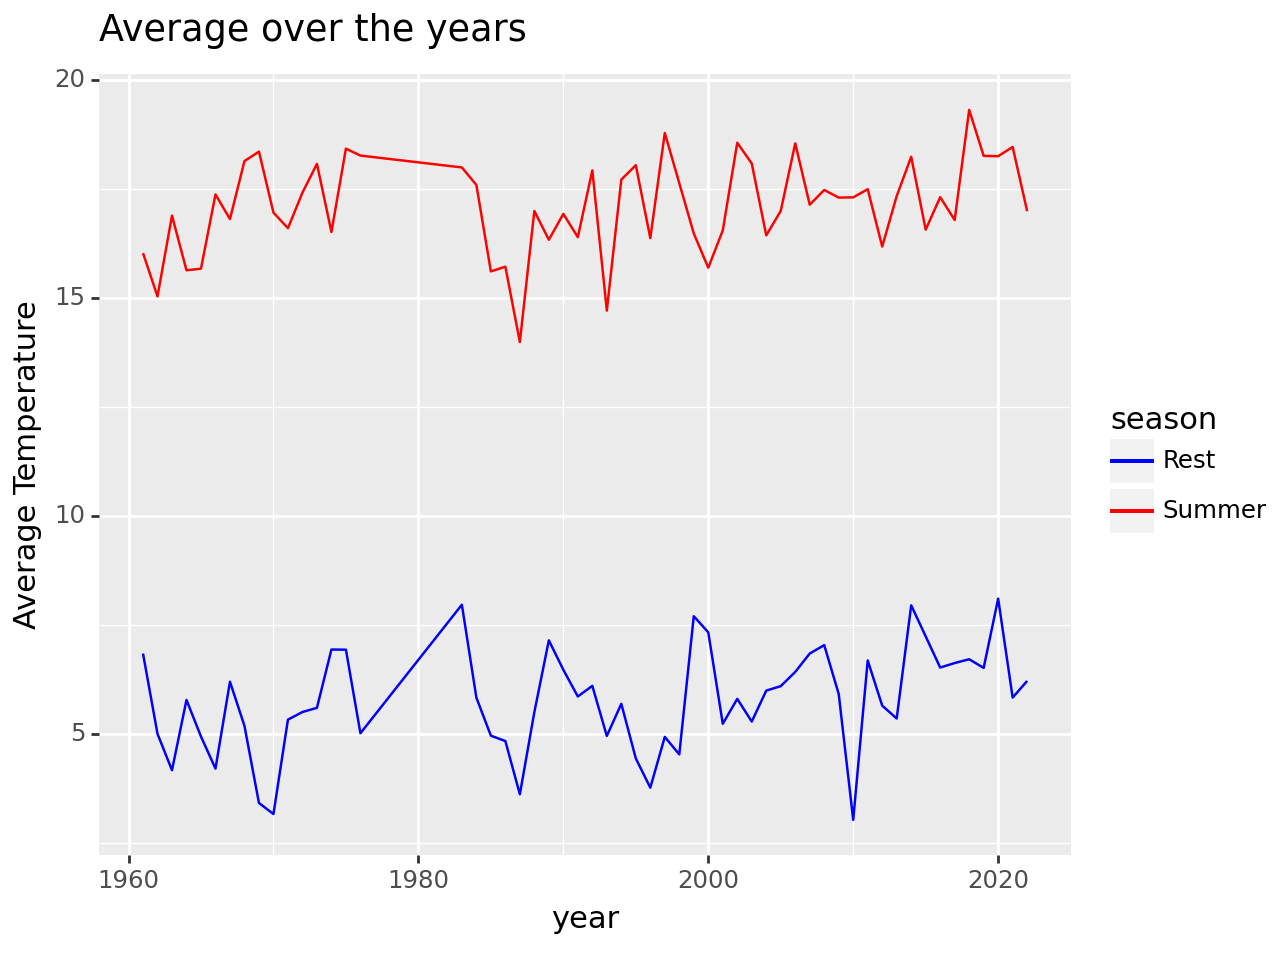

In [262]:
s = y.groupby(['year', 'season'])['Temperature'].mean().reset_index()
y['year'] = pd.Categorical(y['year'], categories=y['year'].unique(), ordered=True)

p10 = (ggplot(y, aes(x='year', y='Temperature', fill='season'))
      + geom_boxplot(position=position_dodge(width=0.5))
      + scale_fill_manual(values = cbPalette, name = 'variable')
      + labs(x = 'Year', title = 'barplot over the years')
      + theme_minimal()
      )
print(p10)

p11 = (ggplot(s, aes(x='year', y='Temperature', color='season'))
     + geom_line()
     + labs(y='Average Temperature', fill='Year', title = 'Average over the years')
     + scale_color_manual(values=['blue', 'red'])
     )
print(p11)

*Brief motivation*

_I also want to observe the temperature trends of summer and other seasons over the past 60 years. Initially, I used a violin plot because it provides more information about the distribution of temperatures during each year. However, due to the large number of years, the final image showed a lot of data noise caused by the overlapping violin shapes. Even when using the simpler Boxplot, there was no significant improvement. Therefore, I used the simplest Line Plot to describe the (average) temperature trends of summer and other seasons over the 60-year period. From the graph, it can be observed that there is no significant upward or downward trend in average temperatures_

## Amounts 

For this part reading Chapter 6 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help.

### Question 4.1 

Barplots are the workhorse for plotting amounts. Create a dataframe with the values from Tab. 6.1 in the [course book](https://clauswilke.com/dataviz/visualizing-amounts.html), and recreate Fig. 6.1 and Fig. 6.3 in the course book.

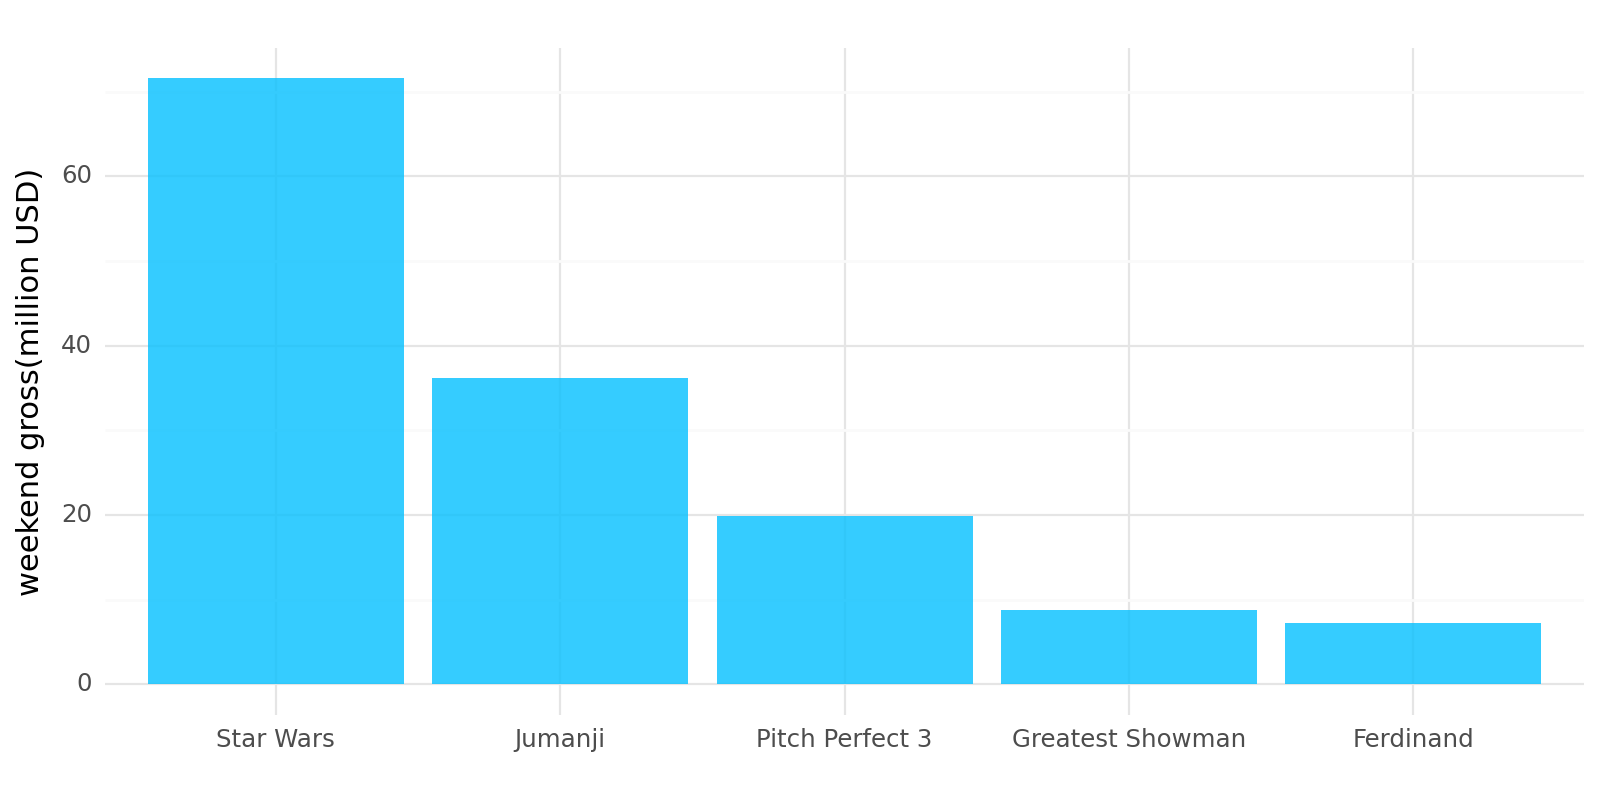

In [272]:
# Insert code here for Fig. 6.1
pd1 = pd.DataFrame({
    "Rank" : ['1', '2', '3', '4', '5'], 
    "Title" : ['Star Wars', 'Jumanji', 'Pitch Perfect 3', 'Greatest Showman', 'Ferdinand'], 
    "Weekend gross" : [71565498 , 36169328, 19928525, 8805843, 7316746]
})

pd1['Title'] = pd.Categorical(pd1['Title'], categories = pd1['Title'].unique(), ordered=True)
pd1['Weekend gross'] = pd1['Weekend gross']/1000000

p = (ggplot(pd1, aes(x='Title', y='Weekend gross')) 
     + geom_bar(stat="identity", fill='#00bfffc9', position="dodge") 
     + labs(y='weekend gross(million USD)', x = '')
     + theme_minimal()
     + theme(figure_size=(8, 4))
     )

print(p)

# Remember to print the visual 

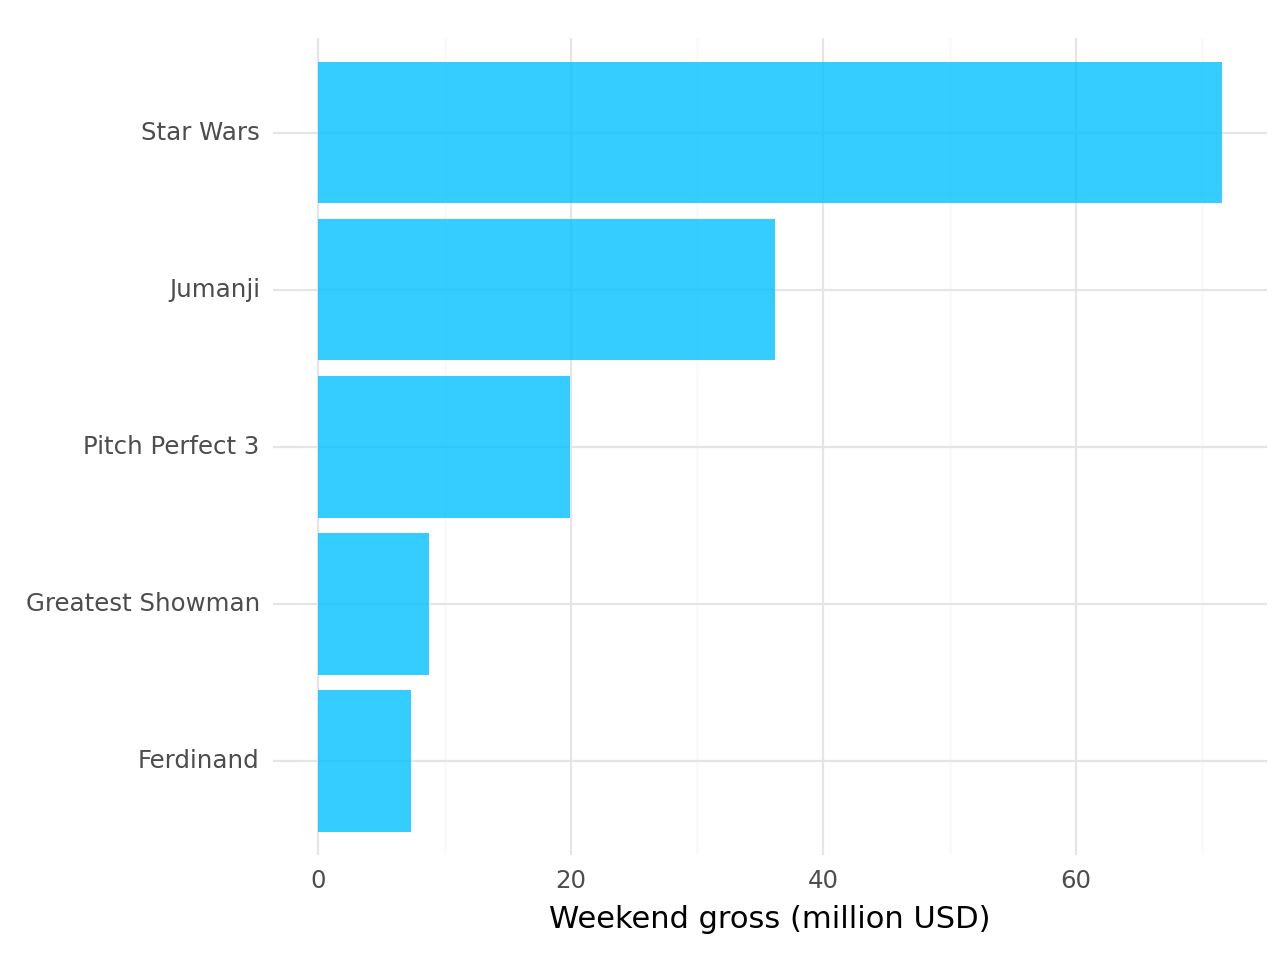

In [275]:
# Insert code here for Fig. 6.2
pd1 = pd.DataFrame({
    "Rank" : ['1', '2', '3', '4', '5'], 
    "Title" : ['Star Wars', 'Jumanji', 'Pitch Perfect 3', 'Greatest Showman', 'Ferdinand'], 
    "Weekend gross" : [71565498 , 36169328, 19928525, 8805843, 7316746]
})

pd1['Title'] = pd.Categorical(pd1['Title'], categories = ['Ferdinand', 'Greatest Showman', 'Pitch Perfect 3', 'Jumanji', 'Star Wars'], ordered=True)
pd1['Weekend gross'] = pd1['Weekend gross']/1000000

p = (ggplot(pd1, aes(x='Title', y='Weekend gross')) 
     + geom_bar(stat="identity", fill='#00bfffc9', position="dodge") 
     + labs(y='Weekend gross (million USD)', x = '')
     + theme_minimal()
     + coord_flip())

print(p)
# Remember to print the visual 

### Question 4.2 

Often we want to highlight a specific column in a barplot. Using the same layout as in the most recent plot highlight the column of Jumanji in orange, and keep the remaining columns grey.

  Rank             Title  Weekend gross
0    1         Star Wars      71.565498
1    2           Jumanji      36.169328
2    3   Pitch Perfect 3      19.928525
3    4  Greatest Showman       8.805843
4    5         Ferdinand       7.316746


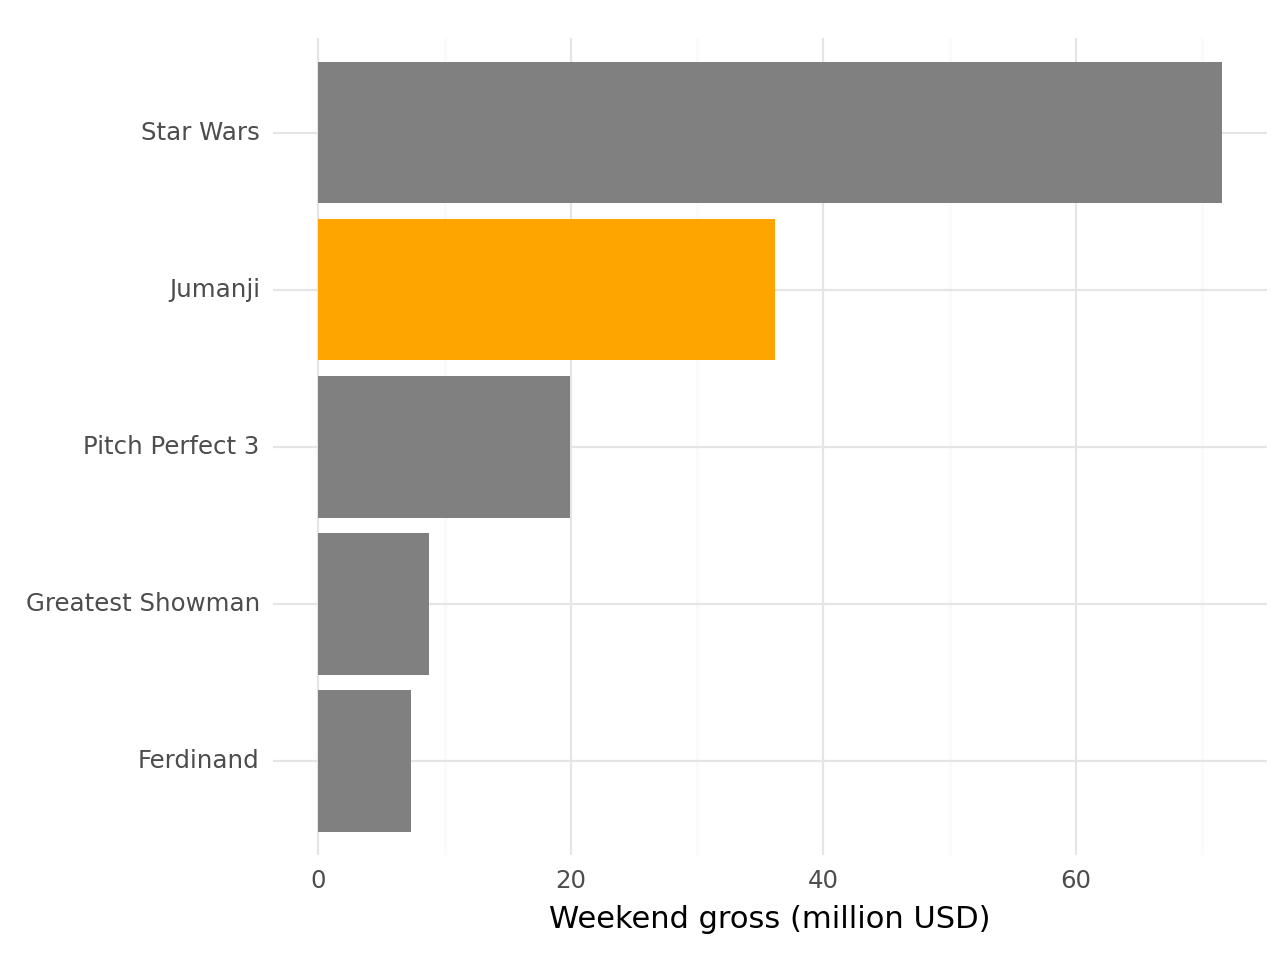

In [276]:
print(pd1)
p = (ggplot(pd1, aes(x='Title', y='Weekend gross')) 
     + geom_bar(stat="identity", position="dodge", fill='grey') 
     + geom_bar(data=pd1[pd1['Title'] == 'Jumanji'], stat="identity", fill='orange', position="dodge") 
     + labs(y='Weekend gross (million USD)', x = '')
     + theme_minimal()
     + coord_flip()
            )
    #  + geom_text(aes(x = 'Jumanji', y = 36169328, label = "36169328")))

print(p)

# Remember to print the visual 

Besides using colors to highlight, adding numbers for the highlighted category can also help. For the Jumanji column also add the number that the bar corresponds to.

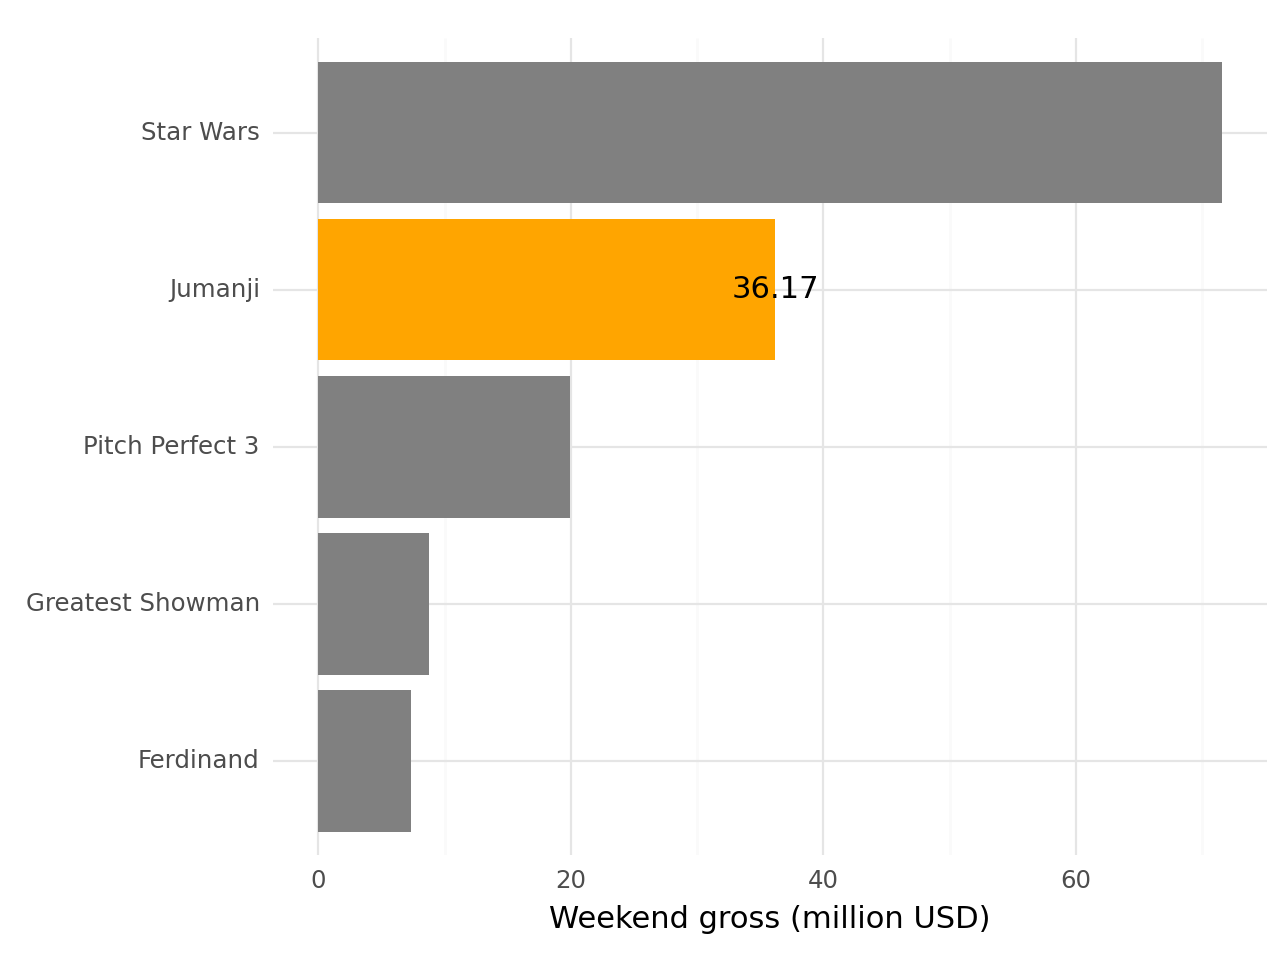

In [279]:
# Insert code here 
p = (ggplot(pd1, aes(x='Title', y='Weekend gross')) 
     + geom_bar(stat="identity", position="dodge", fill='grey') 
     + geom_bar(data=pd1[pd1['Title'] == 'Jumanji'], stat="identity", fill='orange', position="dodge") 
     + geom_text(aes(x = 'Title', y = 36.169328, label = '36.17'), data=pd1[pd1['Title'] == 'Jumanji'])
     + labs(y='Weekend gross (million USD)', x = '')
     + theme_minimal()
     + coord_flip()
            )
    #  + geom_text(aes(x = 'Jumanji', y = 36169328, label = "36169328")))

print(p)


# Remember to print the visual 

### Question 4.3

On the webpage I have uploaded a dataset on the number of marriages in Stockholm, Gothenburg, Malmo and rest of Sweden for 2020, 2015, 2010 and 2005. Using this dataset produce i) a visual where it is easy to see which year Stockholm had the second most marriages, and ii) a visual where it is easy to see how many more marriages there was in Stockholm compared to Gothenburg in 2015. **In each visual I want you to include the number of marriages for each city and year**. 

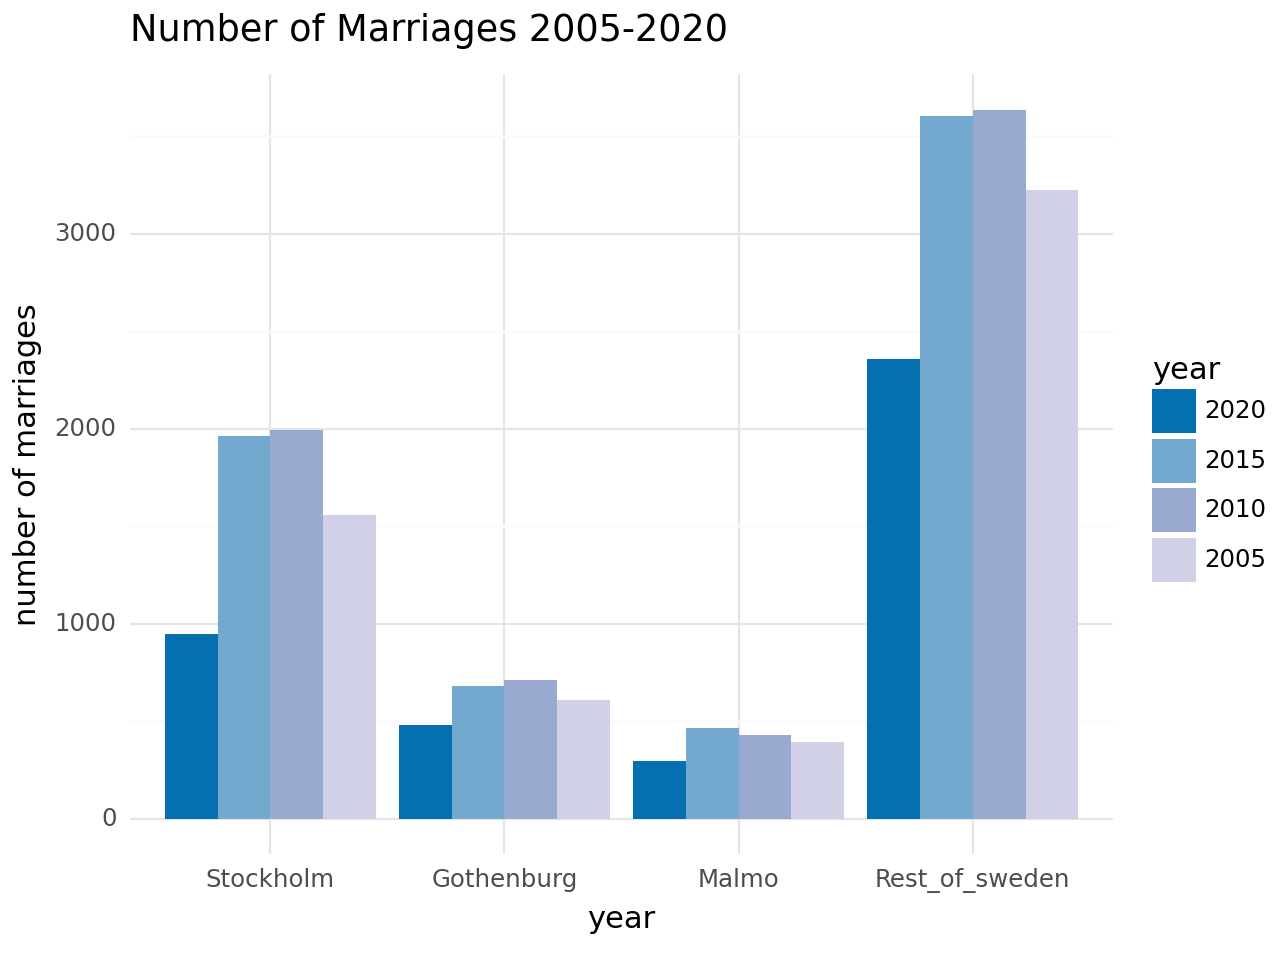

<Figure Size: (640 x 480)>

In [280]:
# Insert code here for part i)
col = ["#0570b0", "#74a9cf", "#99a9cf","#d0d1e6"]
df = pd.read_csv('Marriage.csv')
df['region'] = pd.Categorical(df['region'], categories = df['region'].unique(), ordered=True)
df['year'] = pd.Categorical(df['year'], categories=df['year'].unique(), ordered=True)

p = (ggplot(df, aes(x="region", y="number_marriges", fill="year")) 
     + geom_bar(stat="identity", position="dodge") 
     + labs(x="year", y="number of marriages", title="Number of Marriages 2005-2020") 
     + scale_fill_manual(values=col) 
     + theme_minimal())

p
# Remember to print the visual 

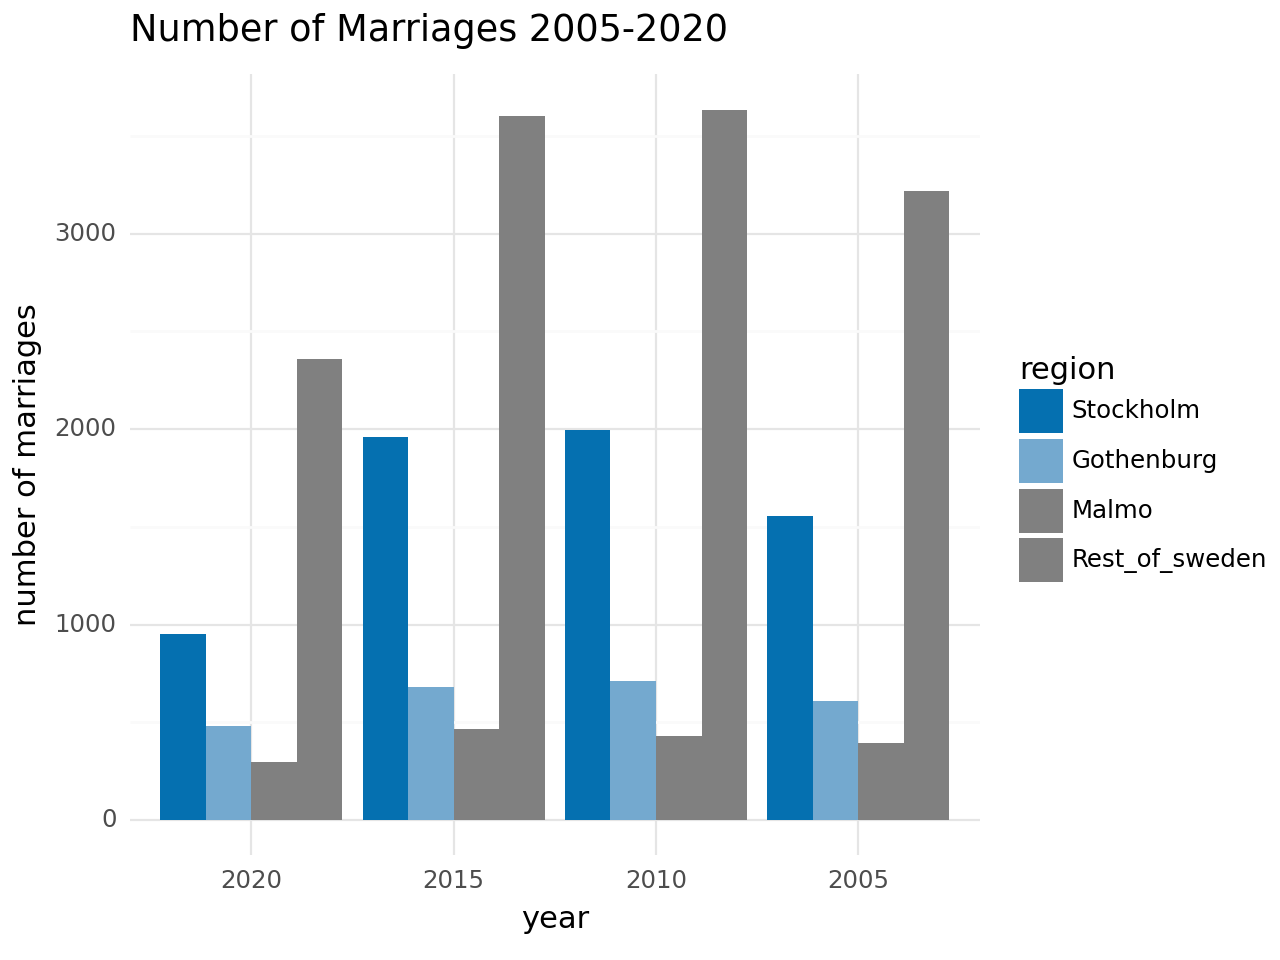

<Figure Size: (640 x 480)>

In [281]:
# Insert code here for part ii)
col = ["#0570b0", "#74a9cf", "grey","grey"]
df = pd.read_csv('Marriage.csv')
df['region'] = pd.Categorical(df['region'], categories = df['region'].unique(), ordered=True)
df['year'] = pd.Categorical(df['year'], categories=df['year'].unique(), ordered=True)

p = (ggplot(df, aes(x="year", y="number_marriges", fill="region")) 
     + geom_bar(stat="identity", position="dodge") 
     + labs(x="year", y="number of marriages", title="Number of Marriages 2005-2020") 
     + scale_fill_manual(values=col) 
     + theme_minimal())

p
# Remember to print the visual 

### Question 4.4

When plotting the mobile operating system data in the lectures I used a classical barplot. Another way which makes it easy to track the trend over several years or across companies is a common line-plot. Using the dataset on the webpage recreate the present on the webpage.

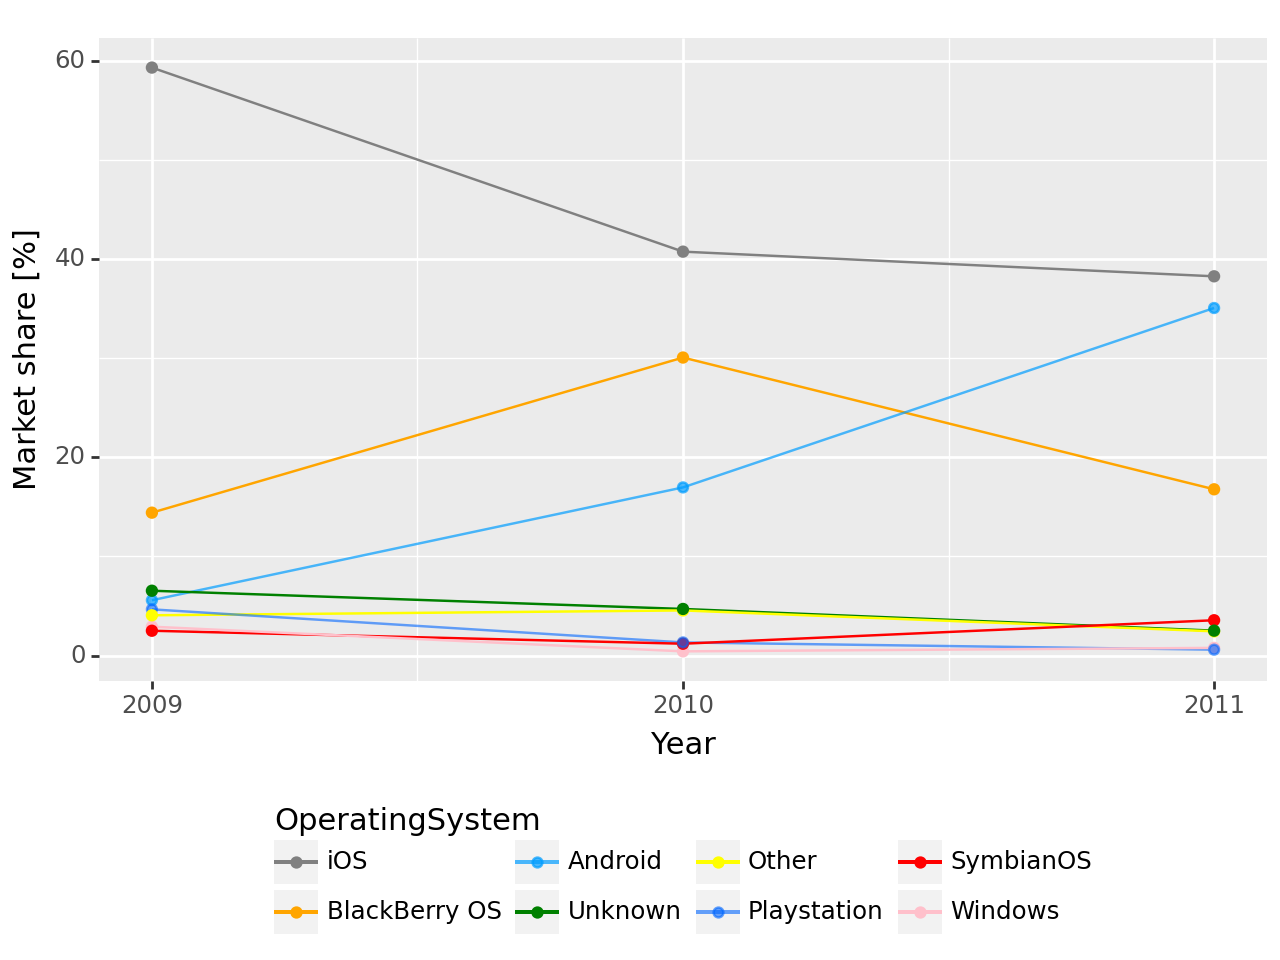

<Figure Size: (640 x 480)>

In [282]:
# Insert code here 
df2 = pd.read_csv('mobile_os_market_share.csv')

color_mapping = {'iOS': 'grey', 'BlackBerry OS': 'orange', 'Android': '#009dffb2', 'Unknown': 'green', 'Playstation': '#0066ff98', 'SymbianOS': 'red','Windows': 'pink', 'Other': 'yellow'}

df2 = df2[df2['Year'] <= 2011]
df2['OperatingSystem'] = pd.Categorical(df2['OperatingSystem'], categories = ['iOS', 'BlackBerry OS', 'Android', 'Unknown', 'Other', 'Playstation', 'SymbianOS', 'Windows'], ordered = True) 

p = (ggplot(df2, aes(x = 'Year', y = 'Share', color = 'OperatingSystem'))
     + geom_line(aes('Year', 'Share'))
     + geom_point()
     + theme(legend_position='bottom')
     + scale_color_manual(values=color_mapping)
     + labs(y = 'Market share [%]')
     + scale_x_continuous(breaks=[2009, 2010, 2011]))

p
# Remember to print the visual 

By default plotnine places the legend for a visual to the right, or bottom depending on a theme. Do you think having a legend next to the visual is the best solution?

_This is not always the best solution. If there are too many categorical variables, the legend can become overly complex, leading to data noise. Readers may find it challenging to connect the information in the legend with the lines that are mixed together._

__Write answer here__

### Question 4.5

In the lecture I provided data on European nations median lifespan. Now using the full dataset (on the webpage) provided on the webpage select a subset of countries and visualize i) life-expectancy across a timespan of your choice and ii) life expectancy in 2020. Provide a brief motivation for your choice of visual - and why your choice is readable.



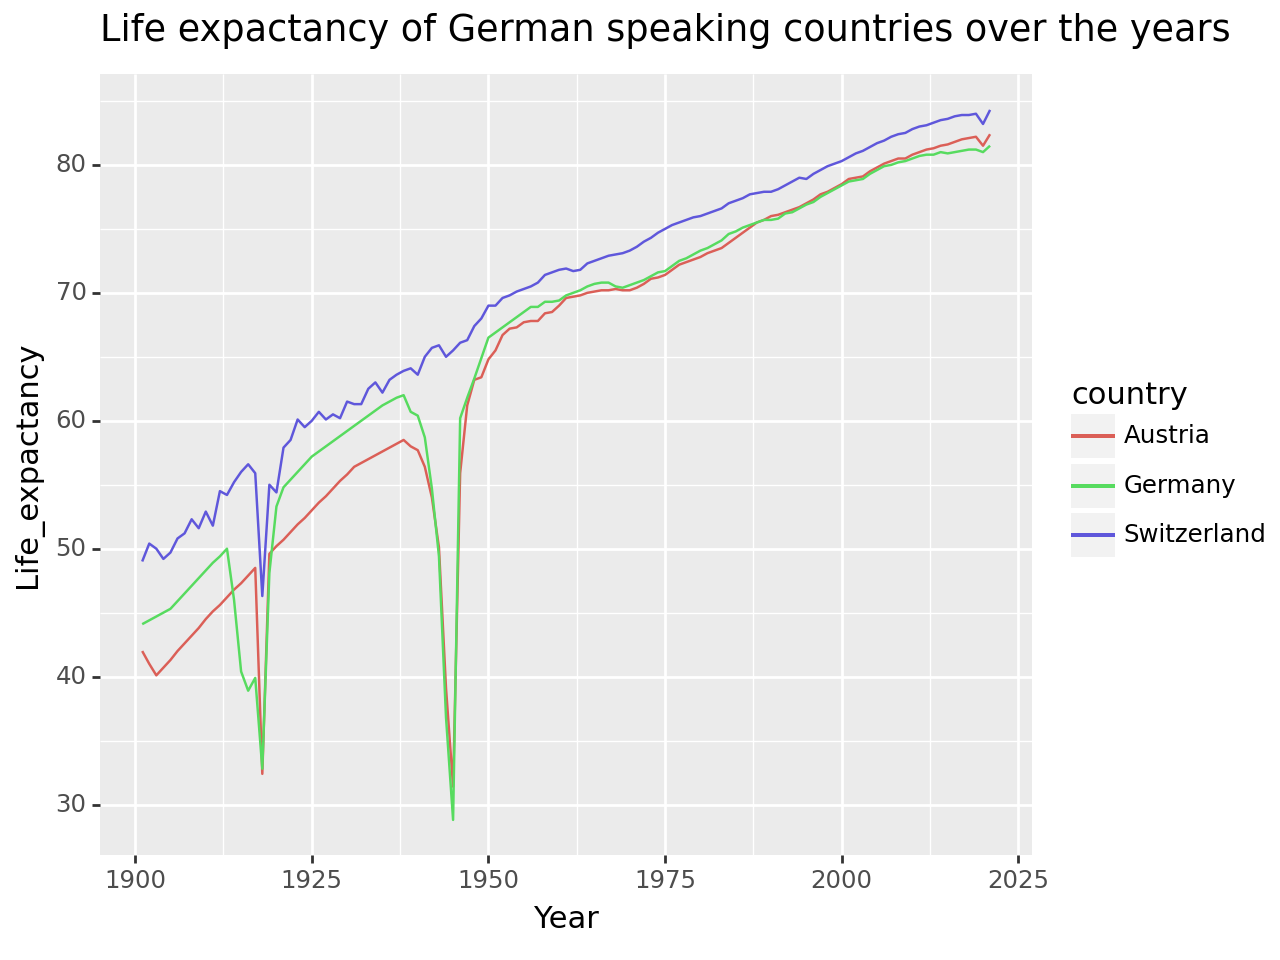

<Figure Size: (640 x 480)>

In [287]:
# Insert code here for part1 
df2 = pd.read_csv('Life_tidy.csv')
df2 = df2[df2['country'].isin(['Austria', 'Germany', 'Switzerland'])]
# df2 = df2[df2['country'].isin(['Portugal', 'Spain'])]
df2

p = (ggplot(df2, aes(x = 'Year', y = 'Life_expactancy', color = 'country'))
     + geom_line()
     + labs(title = 'Life expactancy of German speaking countries over the years'))
p
# Remember to print the visual 

*Brief motivation*

_I would like to observe the changes in life expectancy for the major German-speaking countries. The focus is on examining the trend, so a line plot is very suitable. In cases where there are not many entries, this is the most convenient way to display long-term trends._
_From the plot, it can be observed that the trends for the three countries are generally upward. The two significant declines in Germany and Austria are likely related to wars, while Switzerland shows relatively little change during this period, suggesting a correlation with its policy of neutrality._

         country  Year  Life_expactancy
119      Austria  2020             81.5
603  Switzerland  2020             83.2
724      Germany  2020             81.0


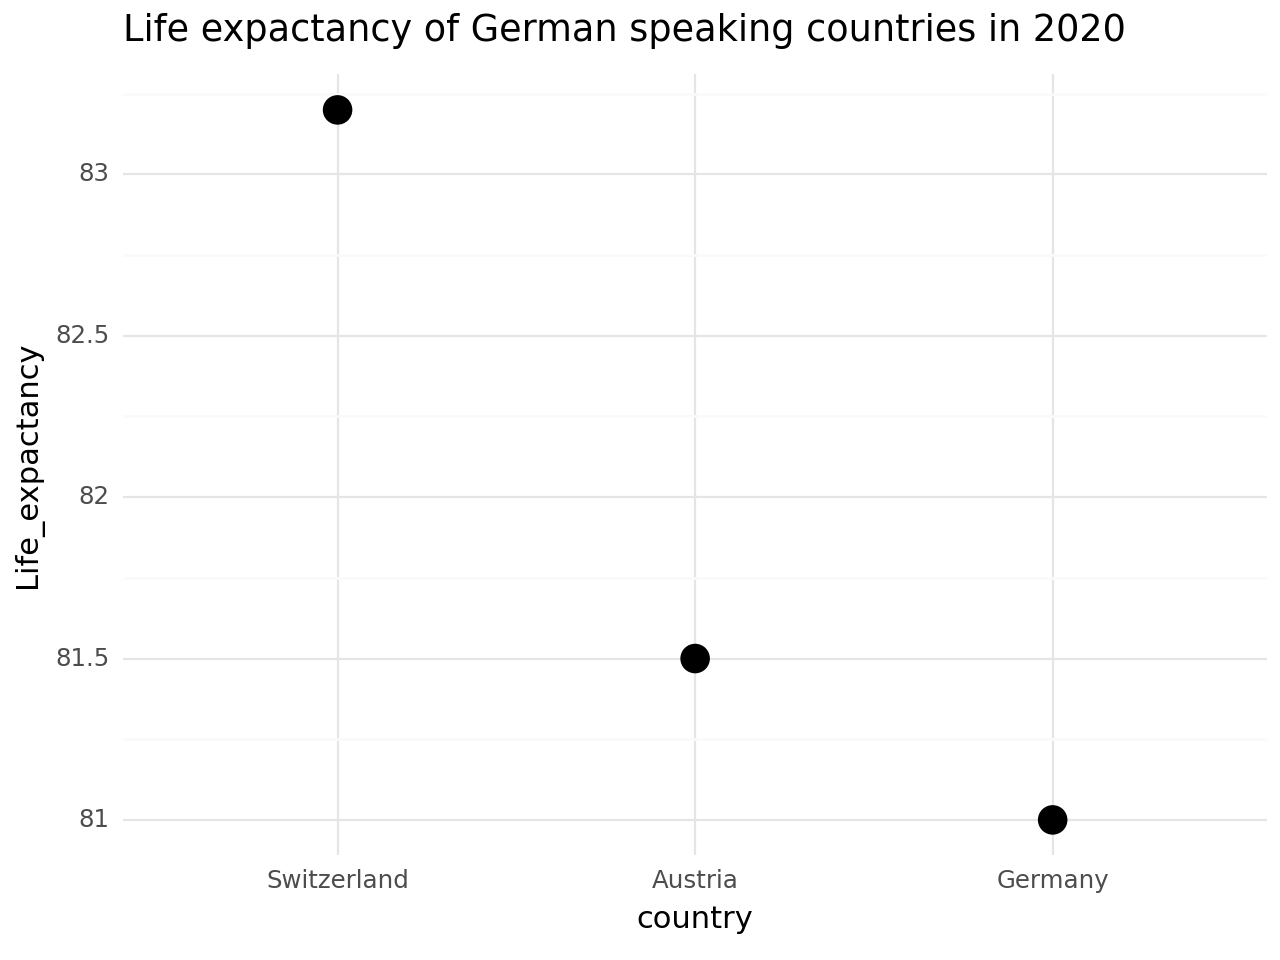

<Figure Size: (640 x 480)>

In [288]:
# Insert code here for part2 
df2 = pd.read_csv('Life_tidy.csv')
df2 = df2[df2['country'].isin(['Austria', 'Germany', 'Switzerland'])]
df2 = df2[df2['Year'] == 2020]
print(df2)

df2['country'] = pd.Categorical(df2['country'], categories = ['Switzerland', 'Austria', 'Germany'], ordered = True) 

p = (ggplot(df2, aes(x = 'country', y = 'Life_expactancy'))
     + geom_point(size = 5)
     + theme_minimal()
     + labs(title = 'Life expactancy of German speaking countries in 2020'))
p
# Remember to print the visual 

*Brief motivation*

_I want to compare the life expectancy of three countries in 2020. Since the numbers are relatively close, long bars in a boxplot may not be conducive to observing ranks. A point plot, using the minimum value as a baseline, makes the data readable, and the ranks are immediately apparent._